<a href="https://colab.research.google.com/github/951237/TIL/blob/master/TIL_2020_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공지능

## TIL - 200209 텐서플로 따라하기(안경잡이 개발자)
- x축은 시간 
- y축은 임금
- 데이터를 기반으로 추후 임금 구하기

### 선형회귀를 이용한 임금 예상하기

In [0]:
import tensorflow as tf

In [0]:
xData = [1, 2, 3, 4, 5, 6, 7]
yData = [25000, 55000, 75000, 110000, 128000, 155000, 180000]

In [0]:
w = tf.Variable(tf.random_uniform([1], -100, 100)) #기울기
b = tf.Variable(tf.random_uniform([1], -100, 100)) # 값

In [0]:
X = tf.placeholder(tf.float32)  # x축 설정하기
Y = tf.placeholder(tf.float32)  # y축 설정하기
H = w * X + b # 회귀선 

In [0]:
cost = tf.reduce_mean(tf.square(H-Y)) # 절대값을 구하여 평균값을 구함
a = tf.Variable(0.01)   # 점프값을 0.01로 정함.
optimizer = tf.train.GradientDescentOptimizer(a)    # 경사하강법을 라이브러리 이용하여 훈련하기
train = optimizer.minimize(cost)    # 무슨뜻?
init = tf.global_variables_initializer()    # 초기화?
sess = tf.Session()     # 세선을 선언
sess.run(init)

In [0]:
for i in range(5001):
    sess.run(train, feed_dict={X : xData, Y : yData})
    if i % 500 == 0:    # 500 번 마다 1번씩
        print(i, sess.run(cost, feed_dict={X : xData, Y : yData}), sess.run(w), sess.run(b))
print(sess.run(H, feed_dict={X : [2]})) # 8시간 일할 때 값을 구하기

0 8632657.0 [25642.848] [1428.6133]
500 8632657.0 [25642.848] [1428.6133]
1000 8632657.0 [25642.848] [1428.6133]
1500 8632657.0 [25642.848] [1428.6133]
2000 8632657.0 [25642.848] [1428.6133]
2500 8632657.0 [25642.848] [1428.6133]
3000 8632657.0 [25642.848] [1428.6133]
3500 8632657.0 [25642.848] [1428.6133]
4000 8632657.0 [25642.848] [1428.6133]
4500 8632657.0 [25642.848] [1428.6133]
5000 8632657.0 [25642.848] [1428.6133]
[52714.31]


### 텐서플로 - 상수

In [0]:
import tensorflow as tf


In [0]:
a = tf.constant(1)  # 상수 선언
b = tf.constant(2)
c = tf.add(a, b)    # 연산식
sess = tf.Session() # 세션만들기
sess.run(c)     # 연산을 수행

3

### 텐서플로 - 변수
- 변수를 바꿔줘야 할경우
- 계산할 때 마다 초기화를 다시 해줘야 함. 

In [0]:
import tensorflow as tf

In [0]:
a = tf.Variable(5)
b = tf.Variable(6)
c = tf.multiply(a, b)   # a, b의 곱하기 식
init = tf.global_variables_initializer()    # ★변수를 선언시 사용할 수 있도록 초기화 하기
sess = tf.Session()
sess.run(init)
sess.run(c)

30

### 텐서플로 - 플레이스 홀더(Placeholder)
- 다른 텐서를 할당함.
- 학습데이터를 포함하는 변수

In [0]:
import tensorflow as tf


In [0]:
input = [1, 2, 3, 4, 5]
x = tf.placeholder(dtype=tf.float32)    # 학습데이터를 포함하는 변수를 선언
y = x + 5       # y 식을 선언

In [0]:
sess = tf.Session()
sess.run(y, feed_dict={x : input})  # 학습데이터를 이용하여 y 값을 구하기

array([ 6.,  7.,  8.,  9., 10.], dtype=float32)

#### 예제 - 평균값 구하기

In [0]:
import tensorflow as tf


In [0]:
math_score = [90, 87, 57, 98, 83]   # 수학점수
english_socre = [88, 89, 78, 99, 68]    # 영어점수

In [0]:
a = tf.placeholder(dtype=tf.float32)    # 수학점수 플레이스홀더
b = tf.placeholder(dtype=tf.float32)    # 영어점수 플레이스홀더
y = (a + b) / 2     # 평균 값 구하는 식

In [0]:
sess = tf.Session()     # 세선선언
sess.run(y, feed_dict={a : math_score, b : english_socre})  #세션값 구하기

array([89. , 88. , 67.5, 98.5, 75.5], dtype=float32)

### 텐서플로 주요함수 실습하기
- 함수를 모두 배울 필요는 없으며, 필요할 때 알아보기

In [0]:
import tensorflow as tf


In [0]:
a = tf.constant(15)
b = tf.constant(6)

In [0]:
sess = tf.Session()
# add
c = tf.add(a,b)
sess.run(c)

21

In [0]:
# 빼기
c = tf.subtract(a, b)
sess.run(c)

9

In [0]:
# 곱하기
c = tf.multiply(a, b)
sess.run(c)

90

In [0]:
# 나누기
c = tf.truediv(a,b)
sess.run(c)

2.5

### 빅데이터 k-means
- 비지도학습
- 사전준비
    - 학생들의 성적에 따라 반을 나눈다
    - 얼마나 많은 반?(초급, 중급, 고급)
    - 데이터 준비
    - 수행하기 위한 방법 선택
- 수행과정
    - 중심에 가까운 데이터를 클러스터에 포함
    - 중심을 클러스터의 중앙으로 이동
    - 위의 과정을 반복

- k-means ++ 
    - 클러스터의 중심점을 자동으로 설정

#### 예제 - 클러스터링

In [0]:
from sklearn.cluster import KMeans  # kmean 라이브러리 호출
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### 데이터프레임 만들기

In [0]:
df = pd.read_csv('/content/drive/My Drive/data/ML/kmean_example.csv', header=None)
df.columns = ['x', 'y']


##### 그래프 그리기

Text(0.29999999999999716, 0.5, 'Y')

<Figure size 1008x576 with 0 Axes>

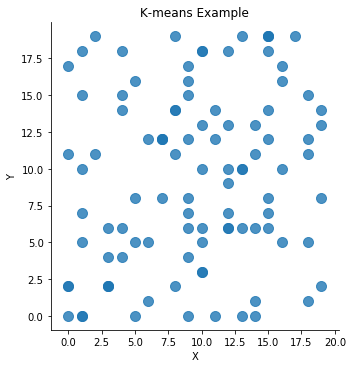

In [0]:
plt.figure(figsize=(14, 8))     # 그래프의 크기 설정하기. 현재 시본에서 작동 안함.
sns.lmplot('x', 'y', data=df,
           fit_reg=False,
           scatter_kws={"s" : 100} # 점의 크기를 100으로 설정하
           )
plt.title('K-means Example')
plt.xlabel('X')
plt.ylabel('Y')

##### 군집화 하기

In [0]:
points = df.values
kmeans = KMeans(n_clusters=4).fit(points)   # kmeans 중심점 4개를 설정하기
kmeans.cluster_centers_ #중심점 찾기
kmeans.labels_  # 클러스터링 라벨 표시하기
df['cluster'] = kmeans.labels_ # 클러스터한 것을 칼럼으로 넣기


##### 클러스터링 한것을 그래프로 표현하기

Text(27.176848958333338, 0.5, 'Y')

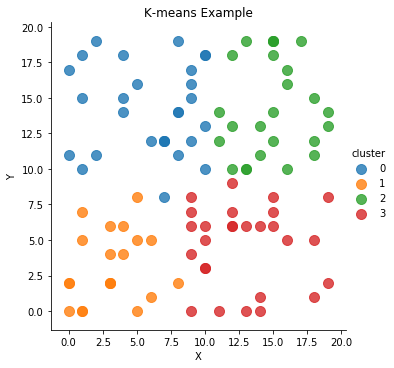

In [0]:
sns.lmplot('x', 'y', data=df,
           fit_reg=False,
           scatter_kws={"s" : 100}, # 점의 크기를 100으로 설정하
           hue = 'cluster')
plt.title('K-means Example')
plt.xlabel('X')
plt.ylabel('Y')

## TIL - 200210 : 배추가격 예측 AI로봇 
- 링크 : https://youtu.be/wZvhBVqitn8

### 데이터 수집
- 기상자료개방포털 
    - 기온 : https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70
    - 강수량 : https://data.kma.go.kr/stcs/grnd/grndRnList.do?pgmNo=69
- 농산물 유통정보 / 채소류 / 배추 / 전체품종
    - 소매가격 / 최소가격

### 데이터 정제
- 평균기온, 최저기온, 최고기온, 강수량, 가격

### 텐서플로 다변인 선형 모델 계발하기
- 변수가 여러가지 인경우 다변인 선형 회귀모델 적용
    - 식 : H(x1, x2, x3, x4) = x1w1 + x2w2 + x3w3 + x4w4 
        - 모든 변인이 가격에 영향을 미친다고 감안. 가중치를 고려하여 식을 세움.
        - 행렬의 곱을 이요한 식 : H(X) = XW
    - 학습률 : 0.000005

#### 라이브러리 호출

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd

#### 데이터 불러오기

In [0]:
data = pd.read_csv('/content/drive/My Drive/data/ML/배추가격_데이터_예제_price data.csv')   # 데이터 파일 불러오기

#### 학습데이터 준비하기

In [0]:
model = tf.global_variables_initializer()   # 텐서플로 변수 초기화 하기
xy = np.array(data, dtype=np.float32)       # 데이터를 넘파이 값으로 담기 
x_data = xy[:, 1:-1]    # 모든행을 선택, 열은 2번째 부터 끝에서 2번째 열까지 선택(변수 4가지)
y_data = xy[:, [-1]]    # 모든행, 마지막 열 선택(가격)

In [0]:
x = tf.placeholder(tf.float32, shape=[None, 4])     # x 축에 들어갈 학습데이터 선언
y = tf.placeholder(tf.float32, shape=[None, 1])     # y 축에 들어갈 학습데이터 선언
w = tf.Variable(tf.random_normal([4,1]), name = 'weight') # 가중치의 변수를 랜덤으로 선언 [4,1]의 의미는 변수의 모양 4개 1행
b = tf.Variable(tf.random_normal([1]), name='bias')       # 바이어스의 변수를 랜덤으로 선언 [1]의 의미는 변수의 형태임 1개 1행

#### 가설식 세우기

In [0]:
hypothesis = tf.matmul(x,w) + b     # 가설식 세우기. 행열의 곱을 이용하여 식 세우기

#### 계산식 세우기

In [0]:
cost = tf.reduce_mean(tf.square(hypothesis - y))    # 계산식 세우기

#### 최적화 함수 선언

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000005) # 최적화 함수 선언 및 학습율 설정하기
train = optimizer.minimize(cost)

#### 세선 만들기

In [0]:
sess = tf.Session() # 세션 만들기
sess.run(tf.global_variables_initializer())   # 변수값 초기화

#### 학습시키기

In [0]:
for step in range(100001):
    cost_, hypo_, _ = sess.run([cost, hypothesis, train], feed_dict={x : x_data, y : y_data})
    if step % 500 == 0:
        print('#', step, "손실비용 : ", cost_)
        print("- 배추가격 : ", hypo_[0])


#### 학습모델 저장하기 

In [0]:
saver = tf.train.Saver()
save_path = saver.save(sess, '/content/drive/My Drive/data/ML/배추가격예상하기/saved.cpkt')
print("학습된 모델을 저장햇습니다.")

학습된 모델을 저장햇습니다.


### 배추가격 예측하기 테스트 코드 작성하기
- 학습모델 저장하는 이유 : 한번 계산후 배추가격을 예상하면 시간이 절약됨.
- 저장된 학습모델을 이용하여 변수를 입력하여 실시간으로 배추가격을 계산하기

In [0]:
import tensorflow as tf
import numpy as np


In [0]:
x = tf.placeholder(tf.float32, shape = [None, 4])
y = tf.placeholder(tf.float32, shape=[None, 1])
w = tf.Variable(tf.random_normal([4,1], name = 'weight'))
b = tf.Variable(tf.random_normal([1]), name = 'bias')

#### 계산식 세우기

In [0]:
hyo

## TIL - 200216 : 배추가격 예상 AI 웹페이지로 구현하기 도전 후기

- 안경잡이개발자 동영상을 따라 구현하려고 함.
- 문제점 발생
    - 텐서프롤가 2.0으로 업그레이드가 되면서 placeholder매서드가 작동하지 않음.
    - 텐서프로 1.X 버전을 2.0d으로 올려주는 라이브러리를 호출하여 적용하였으나 실패함.
- 향후 방향
    - 텐서프로 2.0을 학습하여 적용할 필요가 있음.

## TIL - 200217 : 다이얼로그 플로우 알아보기
- 링크 : https://dialogflow.com
- 강의링크 : https://www.youtube.com/playlist?list=PLRx0vPvlEmdCb33sBZGXzVOMY_seqnWJT

### 강의 내용
- 1. 다이얼로그 플로우의 개요
    - AI를 이용하여 대화를 주고 받을 수 있는 서비스를 생성할 수 있음.
- 2. Intent를 생성해 단순 질의
    - 예상가능한 질문을 입력하면, 구문을 분석하여 알맞은 대답을 함.
- 3. Follow-up Intent를 이용하기
    - 연속적인 대화를 가능하게 함.
    - 질문 → 답변 → 질문 → 답변 등등
    - 입력을 해야함.
- 4. Entity로 단어 분리 인식하기
    - 특정단어를 따로 인식하게 하여 질문에 대한 답변을 정교하게 함.
    - 예시) 
        - python강의를 듣고 싶어. 
            - python 강의를 듣고 싶으시다고요?
        - 응 
            - python 강의를 신청하였습니다.
    - 위의 예시처럼 강의 명을 인식하게 하여 대답을 정교하게 함.
- 5. 엑셀파일 등을 이용하여 데이터를 만들고 json파일을 생성하여 업로드
    - 엑셀에 대량의 데이터를 미리 입력하여, 서버에서 받아들일 수 있는 json형태로 바꾸어 업로드 할 수 있음.
    - 엑셀의 데이터를 json형태로 바꾸는 것은 python등을 이용하여 자동화 할 수 있음.
    - ★★★ 더 공부하고 싶은점.
        - 클래스를 만들어서 손쉽게 데이터를 저장함.
        - 데이터 셋을 만들 때 클래스를 이용하면 코드의 양을 줄일 수 있음.
- 6. 플라스크 연동하기
    - API를 이용하여 웹앱을 만들 때 플라스크를 이용하면 손쉽게(?) 구현할 수 있음.
- 7. 카카오 챗봇 개발하기
    - 다이얼로그 플로우를 개발한 서버에서 구현하고 서버의 API를 카카오 챗봇에 연결하여 챗봇을 구현할 수 있음.
    - 서버를 구현하는 것은 구름 서비스를 이용하면 교육용으로 사용가능
    - 항상 가능한 서비스를 이용하기 위해서는 AWS와 같은 상용 서버 서비스를 이용해야함.

## TIL - 200221 : 따라하기 - 타이타닉 생존예측하기
- 깃허브 링크 : https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb

### 데이터 프레임 로딩

In [0]:
import pandas as pd
train = pd.read_csv('/content/drive/My Drive/data/ML/타이타닉_생존에측/train.csv')
test = pd.read_csv('/content/drive/My Drive/data/ML/타이타닉_생존에측/test.csv')

### 데이터 확인하기

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 데이터 딕셔너리
- 생존 : 0 = No, 1 = Yes
- pclass : 티켓클래스 1 = 1st, 2 = 2nd, 3 = 3rd
- shbsp : 형제자매 수
- parch : 부모, 자녀 동승
- ticket : 티켓 번호
- cabin : 숙소
- embarked : 탑승장소  C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
train.shape

(891, 12)

- 891행과 12개의 칼럼을 가지고 있음.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 나이정보, 숙소, 탑승지에서 에서 결측치가 보임 

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

결측 값
- 나이 177개
- 숙소 687개
- 탑승지 2개

In [8]:
test.shape

(418, 11)

- 418행 11칼럼 

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


- 나이, 숙소, 경비에서 결측값이 있음.

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

결측값
- 나이 : 86개
- 탑승비 : 1개
- 숙소 : 327개

### 시각화 도구 라이브러리 호출

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()   # 시각화 도구로 시본을 기본값으로 설정

### 카테고리 피처 bar chart로 나타내기
- pclass
- sex
- sibsp
- parch
- Embarked
- cabin

#### Bar Chart 함수 만들기

In [0]:
def bar_chart(feature):
    survived = train[ train['Survived'] == 1 ][feature].value_counts() # 생존자 중에서 피처에 해당하는 인원을 시리즈로 생성
    dead = train[train['Survived'] == 0][feature].value_counts()    # 사망자 중에서 피처에 해당하는 인원을 시리즈로 생성
    df = pd.DataFrame([survived, dead])     # 시리즈 2개를 묶어서 데이터 프레임으로 생성
    df.index = ['Survived', 'Dead']         # 인덱스 'Sex'를 'Survived', 'Dead'로 바꿔줌
    df.plot(kind = 'bar', stacked = True, figsize = (10, 5))  # stacked는 1개의 그래프에 누적하여 나타냄


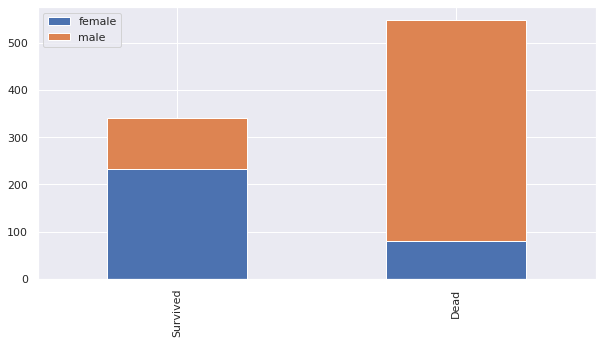

In [13]:
bar_chart('Sex')

- 생존자는 여성의 비율이 높음
- 사망자는 남성의 비율이 높음.
- ★ 성별과 생존률과는 연관성이 있음.

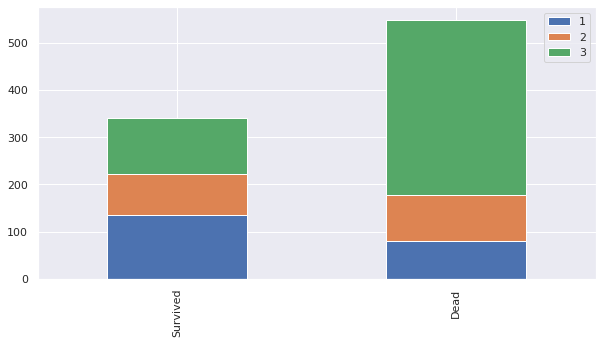

In [14]:
bar_chart('Pclass')

- 생존자중에 1등급이 많음.
- 사망자 중에 3등급 비율이 높음.
- ★생존률과는 클래스와 연관성이 있음.

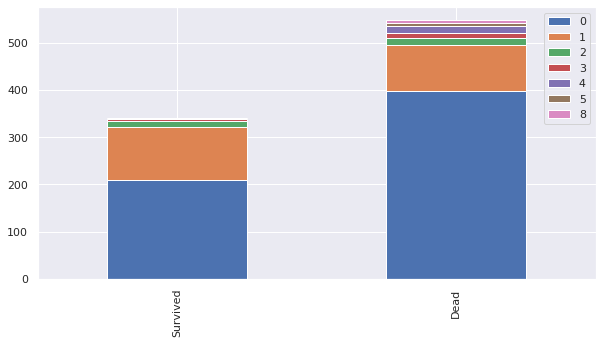

In [15]:
bar_chart('SibSp')

- 사망자에서 혼자인 경우 비율이 높음.
- 가족이 있는 경우 생존률이 높음.


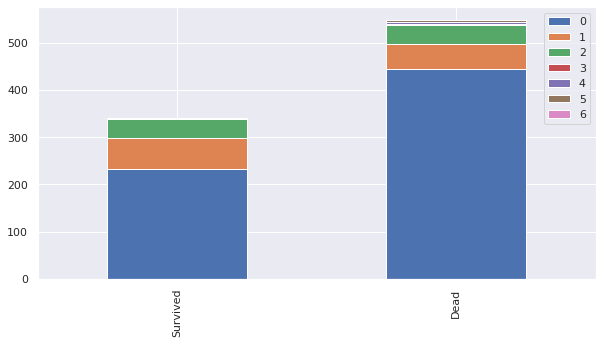

In [16]:
bar_chart('Parch')

- 혼자인경우 사망률이 높음
- 부모 자식이 있는 경우 생존률이 높음.

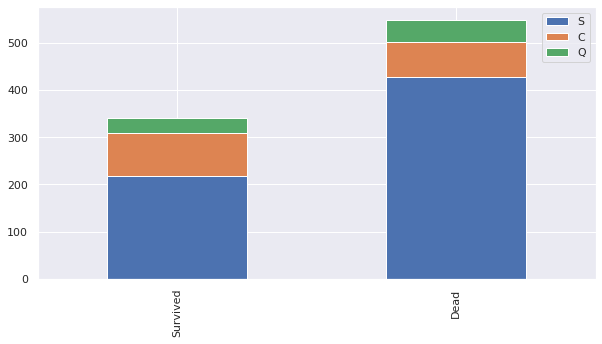

In [17]:
bar_chart('Embarked')

- C인 경우 생존률이 좀 높음.
- S, Q의 경우 사망률이 좀 높음.

### 피처 엔지니어링

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 이름
- 이름에서 데이터 추출
- 정규식 사용

In [19]:
train_test_data = [train, test]
type(train_test_data)

list

In [0]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False) # 이름에서 Mr, Miss 추출

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [24]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Lady          1
Don           1
Jonkheer      1
Ms            1
Sir           1
Countess      1
Mme           1
Capt          1
Name: Title, dtype: int64

In [27]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

##### 타이틀 - 코드로 맵핑하기
- Mr : 0
- Miss : 1
- Mrs : 2
- Others : 3

In [29]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [30]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [0]:
title_mapping = {
    'Mr' : 0, 'Mrs' : 1, 'Miss' : 2, 'Master' : 3, 'Don' : 3, 'Rev' : 3, 'Dr' : 3, 'Mme' : 3, 'Ms' : 3,
       'Major' : 3, 'Lady' : 3, 'Sir' : 3, 'Mlle' : 3, 'Col' : 3, 'Capt' : 3, 'Countess' : 3,
       'Jonkheer' : 3, 'Rev' : 3, 'Dona' : 3
}

- uinque()를 이용해서 변수를 복사해서 입력하면 보다 쉬움.

In [0]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)  # 딕셔너리를 이용하여 데이터 일괄 변환

In [38]:
for dataset in train_test_data:
    print(dataset['Title'].value_counts())
    print()

0    517
2    182
1    125
3     67
Name: Title, dtype: int64

0    240
2     78
1     72
3     28
Name: Title, dtype: int64



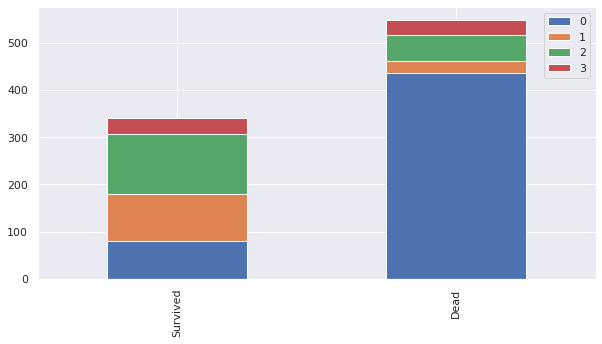

In [39]:
bar_chart('Title')

- Miss의 생존률이 높음.
- Mr의 생존률이 낮음

In [0]:
for dataset in train_test_data:
    dataset.drop('Name', axis = 1, inplace = True)

- 반복문을 이용해서 이름 컬럼을 삭제함.

In [43]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


#### 성별 
- male : 0
- femaile : 1

In [0]:
sex_mapping = {
    "male" : 0,
    "female" : 1
}

In [0]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

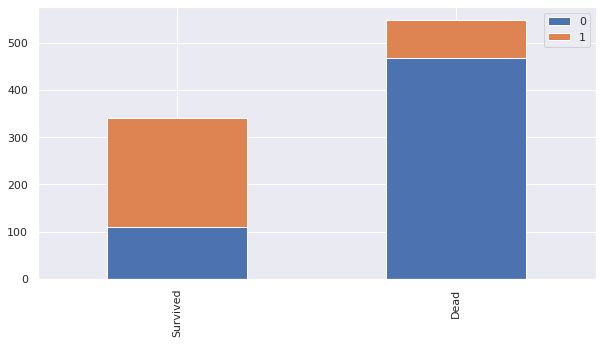

In [46]:
bar_chart('Sex')

#### 나이 

## TIL - 청간전보 머신러닝을 이용하여 이동여부 예측하기 

# HTML / JS / Etc

## TIL - javascript 200216

- 자바스크립트는 자바와는 완전히 다른 언어.
    - 햄과 햄스터 처럼 햄글자만 겹치는 것과 비슷함.
- 하나의 완전한 코딩언어이므로 학습할 양이 많음.
    - 필요한 부분을 프로젝트에 적용하면서 배우는 것이 효과적
- 참고 사이트
    - jquery : https://jquery.com
        - 자바스크립트 코드 라이브러리 사이트
        - 내가 생각하는 기능들은 이미 함수형태로 구현되어 있음. 
        - 사용방법
            - jquery파일을 다운받아서 사용가능
            - 웹페이지 내에 링크형태로 삽입하여 사용가능 (CDN)
    - jqueryui : https://jqueryui.com
        - 자바스크립트 사용자 환경을 구현한 것을 모아 놓음. 

# 파이썬 공부하기

## TIL - 200218 : 무작위 문구 만들기 feat 영민도와주기
- 글자를 무작위로 조합하여 단어만들기
- 알고리즘
    - 글자를 조합할 수 있는 모든 단어들을 생성
    - 각 글자가 1개인 경우만 다른 리스트에 담기
        - 글자가 2번 들어가지 않는 경우.
- 글자가 2개일때
    - 2 * 1 = 2개
- 글자가 3개일 때
    - 3 * 2 * 1 = 6
- 글자가 4개일 때
    - 4 * 3 * 2 * 1 = 24
- 글자가 4개일 때
    - 5 * 4 * 3 * 2 * 1 = 120

### 버전 1

In [0]:
word = ['브', '쯔', '렙', '뎅']
new_word = []
for i in word:
    for l in word:
        for k in word:
            for n in word:
                a = i + l + k + n
                new_word.append(a)
print(len(new_word), new_word)
print()

lst = []
for k in new_word:
    if k.count(word[0]) == 1 and k.count(word[1]) == 1 \
       and k.count(word[2]) == 1 and k.count(word[3]) == 1:
        lst.append(k)
print(len(lst), lst)
print()

for k in lst:
    print(k)




256 ['브브브브', '브브브쯔', '브브브렙', '브브브뎅', '브브쯔브', '브브쯔쯔', '브브쯔렙', '브브쯔뎅', '브브렙브', '브브렙쯔', '브브렙렙', '브브렙뎅', '브브뎅브', '브브뎅쯔', '브브뎅렙', '브브뎅뎅', '브쯔브브', '브쯔브쯔', '브쯔브렙', '브쯔브뎅', '브쯔쯔브', '브쯔쯔쯔', '브쯔쯔렙', '브쯔쯔뎅', '브쯔렙브', '브쯔렙쯔', '브쯔렙렙', '브쯔렙뎅', '브쯔뎅브', '브쯔뎅쯔', '브쯔뎅렙', '브쯔뎅뎅', '브렙브브', '브렙브쯔', '브렙브렙', '브렙브뎅', '브렙쯔브', '브렙쯔쯔', '브렙쯔렙', '브렙쯔뎅', '브렙렙브', '브렙렙쯔', '브렙렙렙', '브렙렙뎅', '브렙뎅브', '브렙뎅쯔', '브렙뎅렙', '브렙뎅뎅', '브뎅브브', '브뎅브쯔', '브뎅브렙', '브뎅브뎅', '브뎅쯔브', '브뎅쯔쯔', '브뎅쯔렙', '브뎅쯔뎅', '브뎅렙브', '브뎅렙쯔', '브뎅렙렙', '브뎅렙뎅', '브뎅뎅브', '브뎅뎅쯔', '브뎅뎅렙', '브뎅뎅뎅', '쯔브브브', '쯔브브쯔', '쯔브브렙', '쯔브브뎅', '쯔브쯔브', '쯔브쯔쯔', '쯔브쯔렙', '쯔브쯔뎅', '쯔브렙브', '쯔브렙쯔', '쯔브렙렙', '쯔브렙뎅', '쯔브뎅브', '쯔브뎅쯔', '쯔브뎅렙', '쯔브뎅뎅', '쯔쯔브브', '쯔쯔브쯔', '쯔쯔브렙', '쯔쯔브뎅', '쯔쯔쯔브', '쯔쯔쯔쯔', '쯔쯔쯔렙', '쯔쯔쯔뎅', '쯔쯔렙브', '쯔쯔렙쯔', '쯔쯔렙렙', '쯔쯔렙뎅', '쯔쯔뎅브', '쯔쯔뎅쯔', '쯔쯔뎅렙', '쯔쯔뎅뎅', '쯔렙브브', '쯔렙브쯔', '쯔렙브렙', '쯔렙브뎅', '쯔렙쯔브', '쯔렙쯔쯔', '쯔렙쯔렙', '쯔렙쯔뎅', '쯔렙렙브', '쯔렙렙쯔', '쯔렙렙렙', '쯔렙렙뎅', '쯔렙뎅브', '쯔렙뎅쯔', '쯔렙뎅렙', '쯔렙뎅뎅', '쯔뎅브브', '쯔뎅브쯔', '쯔뎅브렙', '쯔뎅브뎅', '쯔뎅쯔브', '쯔뎅쯔쯔', '쯔뎅쯔렙', '쯔뎅쯔뎅', '쯔뎅렙브', '쯔뎅렙쯔', '쯔뎅렙렙', '쯔뎅렙뎅', '쯔뎅

### 버전 2
- 글자를 추가할 때, 반복문이 자동으로 추가 되었으면 좋겠다.
- 글자에 맞게 조건이 자동으로 추가 되었으면 좋겠다.

In [0]:
word = ['브', '쯔', '렙', '뎅', '신']

new_word = []   # 단어 생성하기
for i in word:
    for l in word:
        for k in word:
            for n in word:
                for m in word:
                    a = i + l + k + n + m
                    new_word.append(a)
print(len(new_word), new_word)
print()

lst = []
for k in new_word:  
    if k.count(word[0]) == 1 and k.count(word[1]) == 1 \    # 단어에 각 글자가 1개씩 포함되어 있는 조건을 만족한다면.
       and k.count(word[2]) == 1 and k.count(word[3]) == 1 \
       and k.count(word[4]) == 1:
        lst.append(k)       # 리스트에 포함시키기
print(len(lst), lst)
print()

for k in lst:
    print(k)

3125 ['브브브브브', '브브브브쯔', '브브브브렙', '브브브브뎅', '브브브브신', '브브브쯔브', '브브브쯔쯔', '브브브쯔렙', '브브브쯔뎅', '브브브쯔신', '브브브렙브', '브브브렙쯔', '브브브렙렙', '브브브렙뎅', '브브브렙신', '브브브뎅브', '브브브뎅쯔', '브브브뎅렙', '브브브뎅뎅', '브브브뎅신', '브브브신브', '브브브신쯔', '브브브신렙', '브브브신뎅', '브브브신신', '브브쯔브브', '브브쯔브쯔', '브브쯔브렙', '브브쯔브뎅', '브브쯔브신', '브브쯔쯔브', '브브쯔쯔쯔', '브브쯔쯔렙', '브브쯔쯔뎅', '브브쯔쯔신', '브브쯔렙브', '브브쯔렙쯔', '브브쯔렙렙', '브브쯔렙뎅', '브브쯔렙신', '브브쯔뎅브', '브브쯔뎅쯔', '브브쯔뎅렙', '브브쯔뎅뎅', '브브쯔뎅신', '브브쯔신브', '브브쯔신쯔', '브브쯔신렙', '브브쯔신뎅', '브브쯔신신', '브브렙브브', '브브렙브쯔', '브브렙브렙', '브브렙브뎅', '브브렙브신', '브브렙쯔브', '브브렙쯔쯔', '브브렙쯔렙', '브브렙쯔뎅', '브브렙쯔신', '브브렙렙브', '브브렙렙쯔', '브브렙렙렙', '브브렙렙뎅', '브브렙렙신', '브브렙뎅브', '브브렙뎅쯔', '브브렙뎅렙', '브브렙뎅뎅', '브브렙뎅신', '브브렙신브', '브브렙신쯔', '브브렙신렙', '브브렙신뎅', '브브렙신신', '브브뎅브브', '브브뎅브쯔', '브브뎅브렙', '브브뎅브뎅', '브브뎅브신', '브브뎅쯔브', '브브뎅쯔쯔', '브브뎅쯔렙', '브브뎅쯔뎅', '브브뎅쯔신', '브브뎅렙브', '브브뎅렙쯔', '브브뎅렙렙', '브브뎅렙뎅', '브브뎅렙신', '브브뎅뎅브', '브브뎅뎅쯔', '브브뎅뎅렙', '브브뎅뎅뎅', '브브뎅뎅신', '브브뎅신브', '브브뎅신쯔', '브브뎅신렙', '브브뎅신뎅', '브브뎅신신', '브브신브브', '브브신브쯔', '브브신브렙', '브브신브뎅', '브브신브신', '브브신쯔브', '브브신쯔쯔', '브브신쯔렙', '브브신쯔뎅', '브브신쯔신', '브브신